# Exercise 1 - Linear Regression

Initial coding environment, import self defined optimizers and models

In [1]:
import os as _os, sys as _sys
_curr_dir = _sys.path[0]
_base_dir = _os.path.dirname(_os.path.dirname(_curr_dir))
_sys.path.insert(0, _base_dir)
import optimizer as opt, models as md
print('Successfully import <optimizer> and <models>')
del _curr_dir, _base_dir, _os, _sys

Successfully import <optimizer> and <models>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print('Successfully import <matplotlib>, <numpy> and <pandas>')

Successfully import <matplotlib>, <numpy> and <pandas>


In [3]:
def add_column_1_to_vector(*input_vectors):
    assert len(input_vectors) > 0
    assert len(set(map(len, input_vectors))) == 1
    vector_list = list(input_vectors)
    vector_list.insert(0, np.ones(len(input_vectors[0])))
    return np.array(vector_list).T


def normalize(x):
    return (x - x.mean()) / x.std()


print('Two utility functions are defined: <add_column_1_to_vector> and <normalize>')

Two utility functions are defined: <add_column_1_to_vector> and <normalize>


## Q1. Linear regression with one variable

Original data plotting:

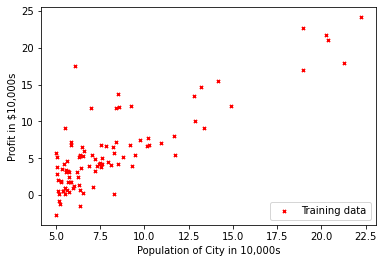

In [4]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
x, y = data[:, 0], data[:, 1]

plt.scatter(x, y, s=10, c='r', marker='x', label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')
plt.show()

Linear regression using self defined gradient descent optimizer:

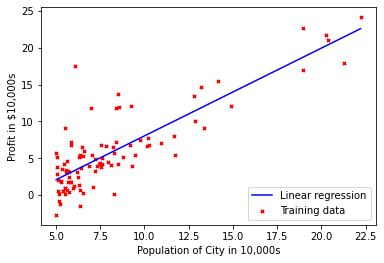

In [5]:
lr_model = md.LinearRegression(add_column_1_to_vector(x), y)

gd = opt.GradientDescent(
    l_rate=1E-3,
    max_iter=1E5,
    g_tol=1E-5,
    g_norm=2,
)

lr_model.train(gd)
x_line = [min(x), max(x)]
y_line = lr_model.predict(add_column_1_to_vector(x_line))

plt.scatter(x, y, s=10, c='r', marker='x', label='Training data')
plt.plot(x_line, y_line, c='blue', label='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')
plt.show()

del x_line, y_line, gd

Loss function visualization in 3D and contour:

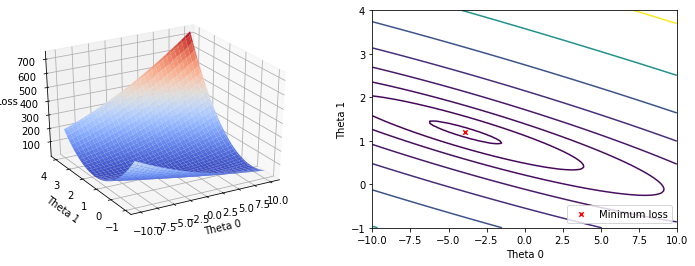

In [6]:
theta_0 = np.arange(-10, 10.2, 0.2)
theta_1 = np.arange(-1, 4.05, 0.05)
loss = np.array([[lr_model.loss_function(np.array([t0, t1]))
                  for t0 in theta_0] for t1 in theta_1])

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121, projection='3d')
x_theta, y_theta = np.meshgrid(theta_0, theta_1)
ax1.plot_surface(x_theta, y_theta, loss, cmap='coolwarm')
ax1.set_xlabel('Theta 0')
ax1.set_ylabel('Theta 1')
ax1.set_zlabel('Loss')
ax1.view_init(elev=30, azim=240)

ax2 = fig.add_subplot(122)
contour_levels = [0, 5, 10, 20, 40, 80, 160, 320, 640]
ax2.contour(x_theta, y_theta, loss, levels=contour_levels)
ax2.scatter([lr_model.result.theta[0]], [lr_model.result.theta[1]],
            s=20, c='red', marker='x', label='Minimum loss')
ax2.set_xlabel('Theta 0')
ax2.set_ylabel('Theta 1')
ax2.legend(loc='lower right')

plt.show()

del theta_0, theta_1, loss, fig, ax1, ax2, x_theta, y_theta, contour_levels

In [7]:
# Before step into Q2, clean up Q1 local variables
del data, x, y, lr_model
print('Successfully clean up Q1 memories')

Successfully clean up Q1 memories


## Q2. Linear regression with multiple variables

Original data plotting:

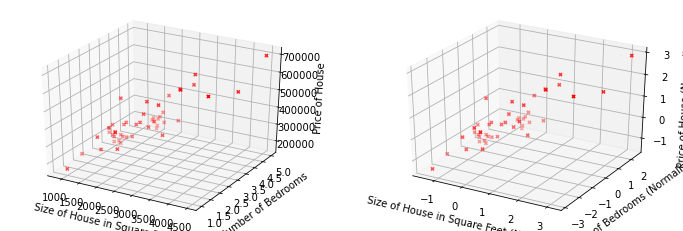

In [8]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
x1, x2, y = data[:, 0], data[:, 1], data[:, 2]
x1_n, x2_n, y_n = normalize(x1), normalize(x2), normalize(y)

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, y, s=10, c='red', marker='x', label='Training data')
ax1.set_xlabel('Size of House in Square Feet')
ax1.set_ylabel('Number of Bedrooms')
ax1.set_zlabel('Price of House')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x1_n, x2_n, y_n, s=10, c='red', marker='x', label='Training data')
ax2.set_xlabel('Size of House in Square Feet (Normalized)')
ax2.set_ylabel('Number of Bedrooms (Normalized)')
ax2.set_zlabel('Price of House (Normalized)')

plt.show()

del fig, ax1, ax2

Linear regression using self defined gradient descent optimizer:

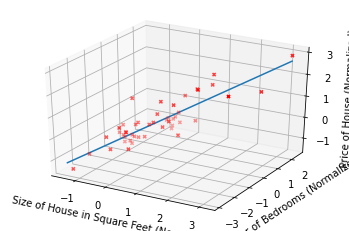

In [9]:
lr_model = md.LinearRegression(add_column_1_to_vector(x1_n, x2_n), y_n)

gd = opt.GradientDescent(
    l_rate=1E-3,
    max_iter=1E5,
    g_tol=1E-5,
    g_norm=2,
)

lr_model.train(gd)
x1_line = [min(x1_n), max(x1_n)]
x2_line = [min(x2_n), max(x2_n)]
y_line = lr_model.predict(add_column_1_to_vector(x1_line, x2_line))

fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_n, x2_n, y_n, s=10, c='red', marker='x', label='Training data')
ax.plot(x1_line, x2_line, y_line)
ax.set_xlabel('Size of House in Square Feet (Normalized)')
ax.set_ylabel('Number of Bedrooms (Normalized)')
ax.set_zlabel('Price of House (Normalized)')
plt.show()

del x1_line, x2_line, y_line, ax, gd

Selecting learning rates:

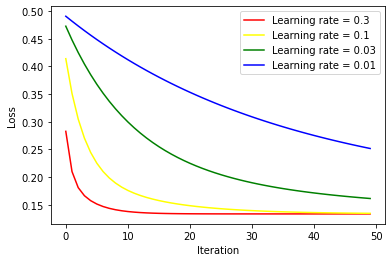

In [10]:
def loss_by_iteration(learning_rate, max_iteration):
    gd_sbs = opt.SBS.GradientDescent(
        l_rate=learning_rate,
        max_iter=max_iteration,
        iter_mul=1,
    )
    trainer = lr_model.get_trainer(gd_sbs)
    init_val = next(trainer)
    return np.array([lr_model.loss_function(step.theta) for step in trainer])


max_iter = 50
x_loss = np.arange(max_iter)
for lr, c in [(0.3, 'red'), (0.1, 'yellow'), (0.03, 'green'), (0.01, 'blue')]:
    y_loss = loss_by_iteration(lr, max_iter)
    plt.plot(x_loss, y_loss, c=c, label=f'Learning rate = {lr}')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

del loss_by_iteration, max_iter, x_loss, y_loss, lr, c

In [11]:
# Before step into Q3, clean up Q2 local variables
del data, x1, x2, y, x1_n, x2_n, y_n, lr_model
print('Successfully clean up Q2 memories')

Successfully clean up Q2 memories


## Q3. Normal equations

Q1 data and gradient descent result recap:

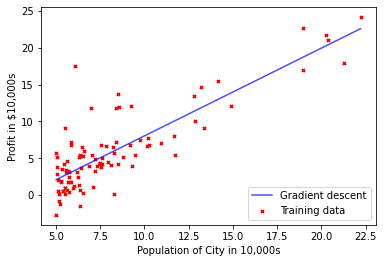

In [12]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
x, y = data[:, 0], data[:, 1]

lr_model = md.LinearRegression(add_column_1_to_vector(x), y)

gd = opt.GradientDescent(
    l_rate=1E-3,
    max_iter=1E5,
    g_tol=1E-5,
    g_norm=2,
)

lr_model.train(gd)
x_line = [min(x), max(x)]
y_gd = lr_model.predict(add_column_1_to_vector(x_line))

plt.scatter(x, y, s=10, c='r', marker='x', label='Training data')
plt.plot(x_line, y_gd, c='blue', alpha=0.7, label='Gradient descent')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')
plt.show()

del gd

Normal equations result:

Gradient descent: array([-3.8957257,  1.1930281])
Normal equations: array([-3.89578088,  1.19303364])


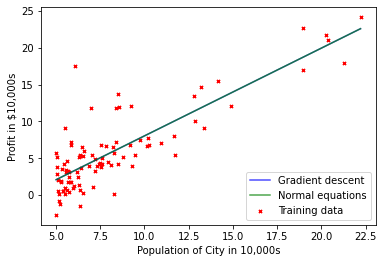

In [13]:
x_matrix = add_column_1_to_vector(x)
theta = np.linalg.inv((x_matrix.T @ x_matrix)) @ x_matrix.T @ y
print(f'Gradient descent: {repr(lr_model.result.theta)}')
print(f'Normal equations: {repr(theta)}')

y_ne = add_column_1_to_vector(x_line) @ theta

plt.scatter(x, y, s=10, c='r', marker='x', label='Training data')
plt.plot(x_line, y_gd, c='blue', alpha=0.7, label='Gradient descent')
plt.plot(x_line, y_ne, c='green', alpha=0.7, label='Normal equations')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')
plt.show()

del x_matrix, x_line, y_gd, y_ne

In [14]:
# Finally, clean up Q3 memories
del data, x, y, lr_model, theta
print('Successfully clean up Q3 memories')

Successfully clean up Q2 memories
